<a href="https://colab.research.google.com/github/NimaZah/Divorce/blob/main/General_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicting Divorce**

####**Nima Zahedinameghi**

Divorce Predictors Scale (DPS) is a scale that measures the probability of divorce. Here, I try to use ML to predict the probability of divorce for couples based on the loaded dataset. The results of my model to predict divorce probability are shown in the end of the analysis. My model has the accuracy of 98%.


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/NimaZah/Divorce/main/divorce.csv')
df.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,harmony,freeom_value,entertain,people_goals,dreams,love,happy,marriage,roles,trust,likes,care_sick,fav_food,stresses,inner_world,anxieties,current_stress,hopes_wishes,know_well,friends_social,Aggro_argue,Always_never,negative_personality,offensive_expressions,insult,humiliate,not_calm,hate_subjects,sudden_discussion,idk_what's_going_on,calm_breaks,argue_then_leave,silent_for_calm,good_to_leave_home,silence_instead_of_discussion,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1


In [4]:
# Checking for NA values
df.isna().sum()

Sorry_end                        0
Ignore_diff                      0
begin_correct                    0
Contact                          0
Special_time                     0
No_home_time                     0
2_strangers                      0
enjoy_holiday                    0
enjoy_travel                     0
common_goals                     0
harmony                          0
freeom_value                     0
entertain                        0
people_goals                     0
dreams                           0
love                             0
happy                            0
marriage                         0
roles                            0
trust                            0
likes                            0
care_sick                        0
fav_food                         0
stresses                         0
inner_world                      0
anxieties                        0
current_stress                   0
hopes_wishes                     0
know_well           

In [6]:
# How many unique values are in the data frame?
df.nunique()

Sorry_end                        5
Ignore_diff                      5
begin_correct                    5
Contact                          5
Special_time                     5
No_home_time                     5
2_strangers                      5
enjoy_holiday                    5
enjoy_travel                     5
common_goals                     5
harmony                          5
freeom_value                     5
entertain                        5
people_goals                     5
dreams                           5
love                             5
happy                            5
marriage                         5
roles                            5
trust                            5
likes                            5
care_sick                        5
fav_food                         5
stresses                         5
inner_world                      5
anxieties                        5
current_stress                   5
hopes_wishes                     5
know_well           

Sorry_end                          AxesSubplot(0.125,0.799681;0.0824468x0.0803191)
Ignore_diff                      AxesSubplot(0.223936,0.799681;0.0824468x0.0803...
begin_correct                    AxesSubplot(0.322872,0.799681;0.0824468x0.0803...
Contact                          AxesSubplot(0.421809,0.799681;0.0824468x0.0803...
Special_time                     AxesSubplot(0.520745,0.799681;0.0824468x0.0803...
No_home_time                     AxesSubplot(0.619681,0.799681;0.0824468x0.0803...
2_strangers                      AxesSubplot(0.718617,0.799681;0.0824468x0.0803...
enjoy_holiday                    AxesSubplot(0.817553,0.799681;0.0824468x0.0803...
enjoy_travel                       AxesSubplot(0.125,0.703298;0.0824468x0.0803191)
common_goals                     AxesSubplot(0.223936,0.703298;0.0824468x0.0803...
harmony                          AxesSubplot(0.322872,0.703298;0.0824468x0.0803...
freeom_value                     AxesSubplot(0.421809,0.703298;0.0824468x0.0803...
ente

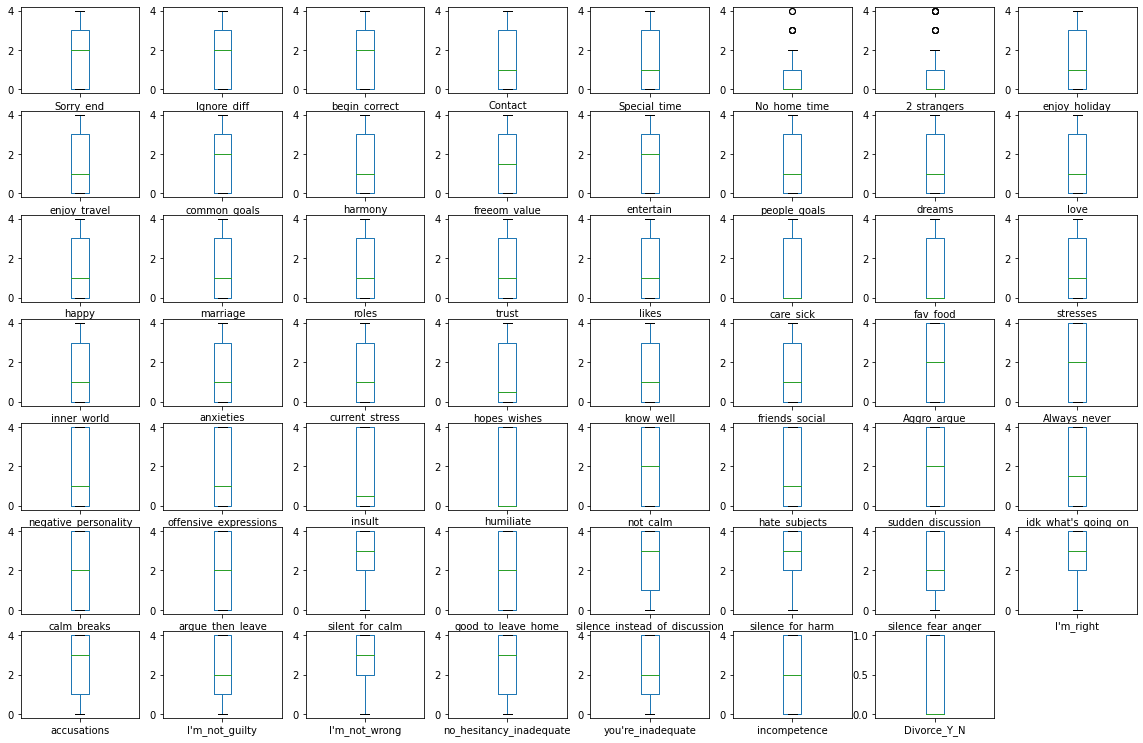

In [7]:
# Take a quick look at the distribution of the variables in the form of box plots.
df.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False, figsize=(20,15))

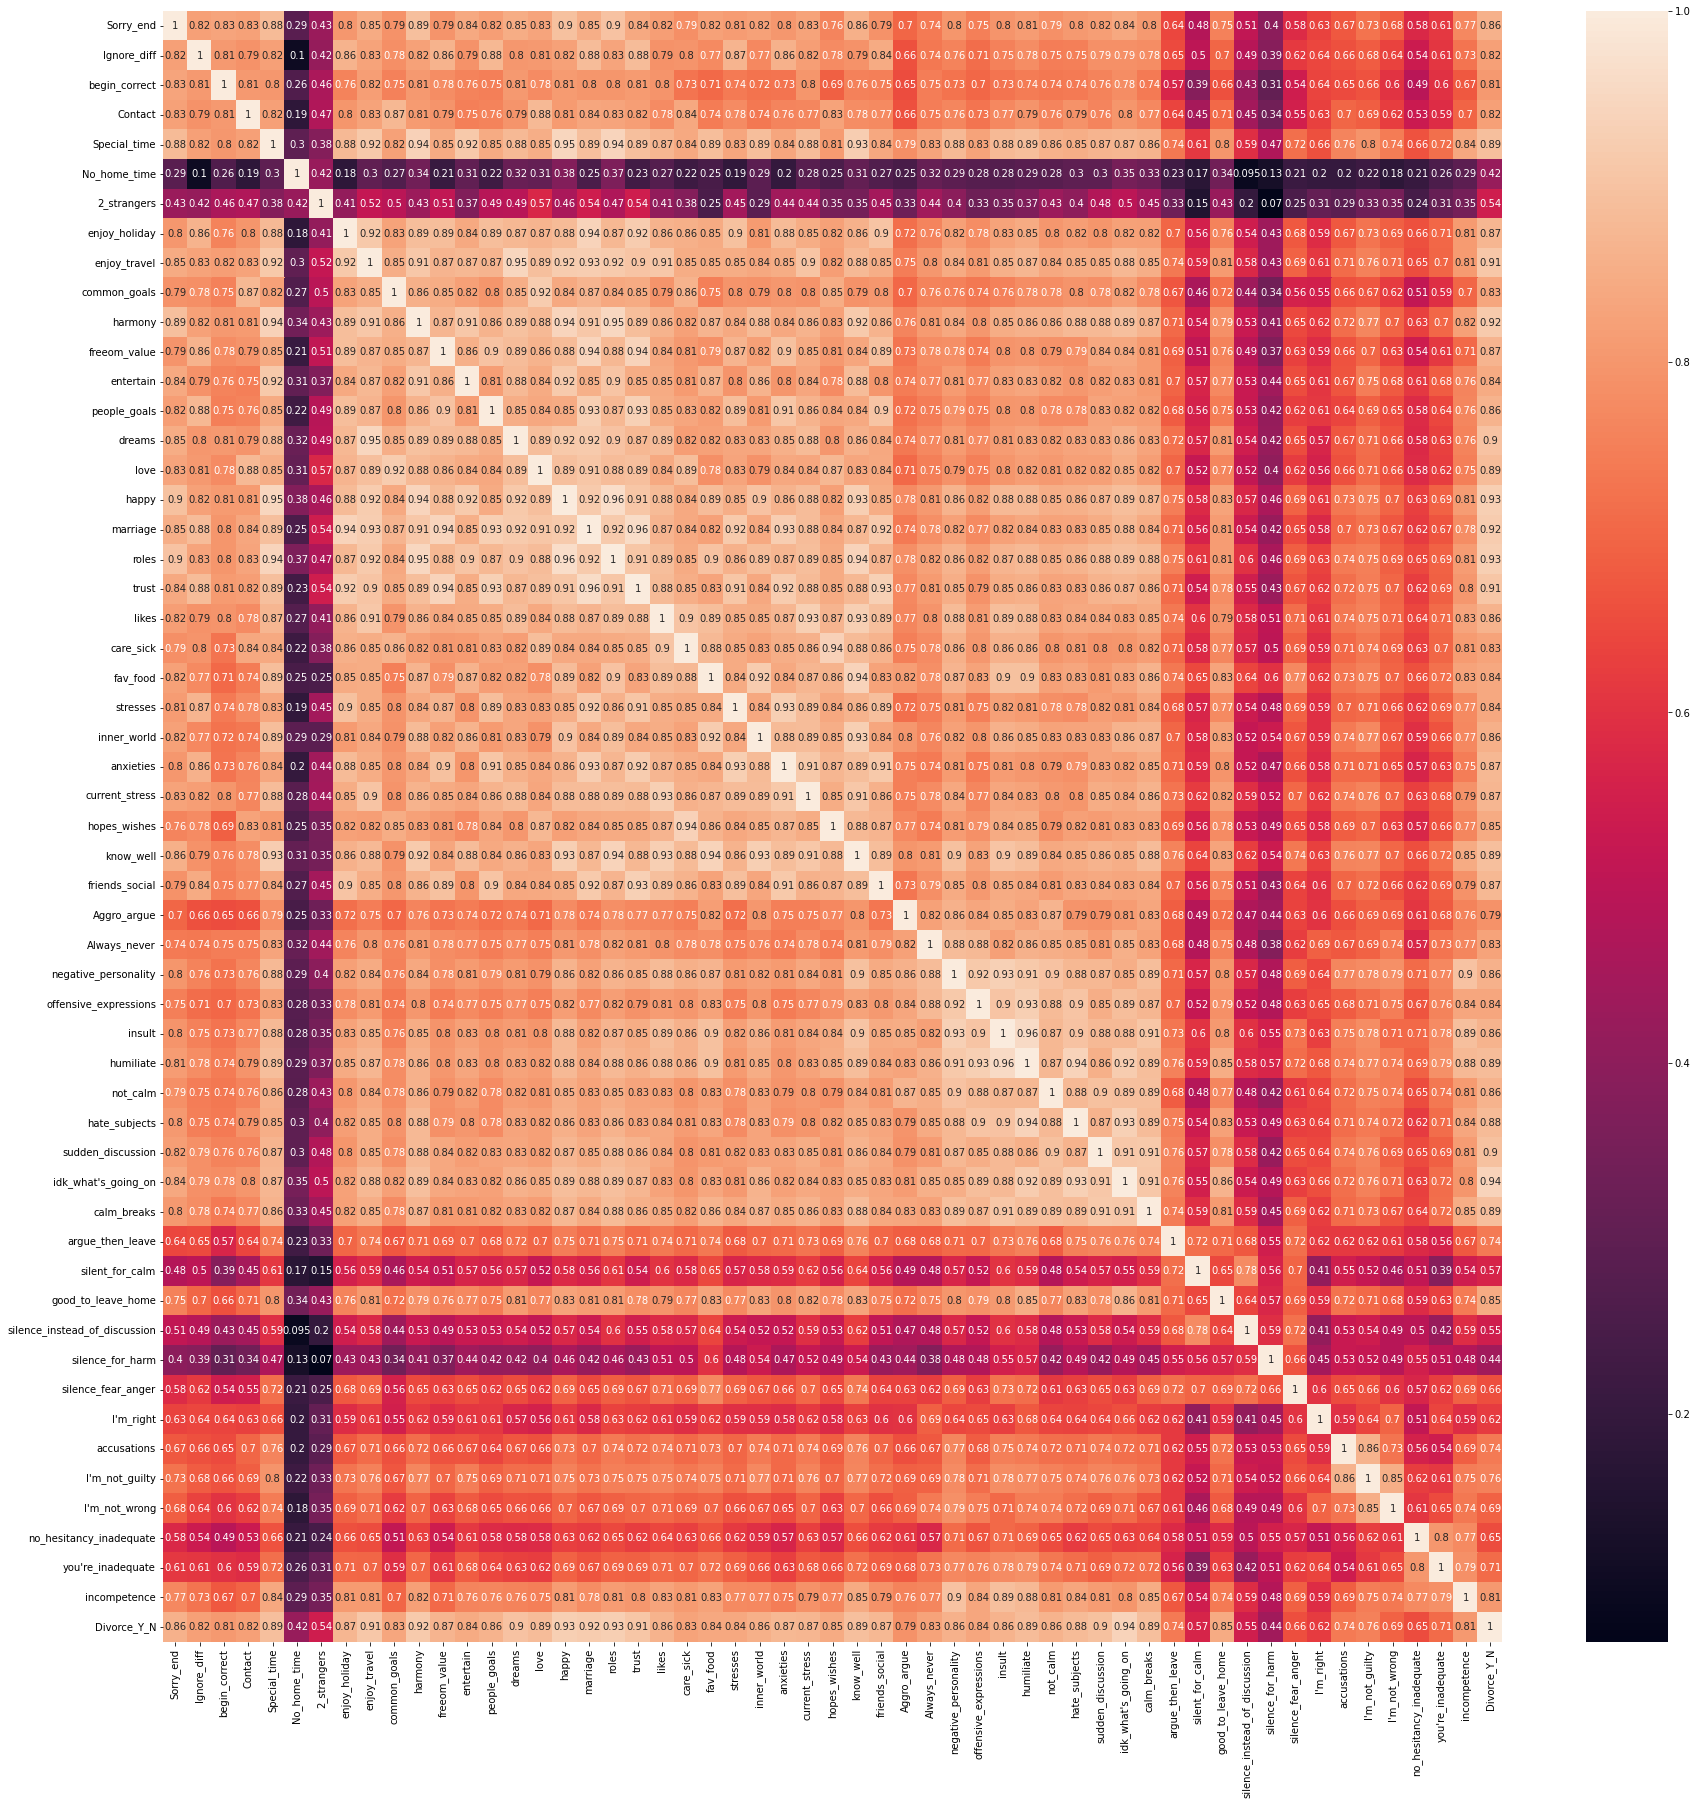

In [11]:

# What are the key indicators for divorce? To answer this question, we can look at the correlation between the variables.
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)

In [12]:
# Test Train Split
Y = df.Divorce_Y_N
X = df.drop(['Divorce_Y_N'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)



In [13]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
prediction = knn.predict(X_test)
print(classification_report(Y_test, prediction))
print(confusion_matrix(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.96      0.98        26

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51

[[25  0]
 [ 1 25]]
